In [10]:
import numpy as np
import xarray as xr
import netCDF4 as nc
from os import listdir, mkdir
from os.path import join, exists
import matplotlib
from matplotlib import pyplot as plt
from calendar import monthrange
import cartopy
from datetime import datetime
from cartopy import crs as ccrs

In [2]:
%matplotlib inline
matplotlib.rcParams["font.size"] = 18

In [3]:
def display_pole_field(field,lat,lon,u=None,v=None,vmin=None,vmax=None):
    # field, u, and v must have shape (lat, lon)
    data_crs = ccrs.PlateCarree() 
    ax_crs = ccrs.Orthographic(-10,90)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,projection=ax_crs)
    im = ax.pcolormesh(lon,lat,field,shading='nearest',cmap='coolwarm',transform=data_crs,vmin=vmin,vmax=vmax)
    # If there's a vector field, overlay that 
    if u is not None and v is not None:
        lon_subset = np.arange(0,lon.size,3) #np.linspace(0,lon.size-1,24).astype(int)
        lat_subset = np.arange(2,lat.size-1,3) #np.linspace(1,lat.size-2,60).astype(int)
        ax.quiver(
            lon[lon_subset],lat[lat_subset],
            u[lat_subset,:][:,lon_subset],
            v[lat_subset,:][:,lon_subset],
            transform=data_crs,color='black',zorder=5,
        )
    ax.add_feature(cartopy.feature.COASTLINE, zorder=3, edgecolor='black')
    fig.colorbar(im,ax=ax)
    return fig,ax,data_crs



In [4]:
filedict = dict({
    "e5": "/scratch/jf4241/ecmwf_data/era5_data/raw_data/2022-08-14/"
})

In [5]:
!du -h {filedict['e5']}

24G	/scratch/jf4241/ecmwf_data/era5_data/raw_data/2022-08-14/


In [6]:
da = xr.open_dataset(join(filedict['e5'],"2018-01.nc"))

In [22]:
year = da['time'].dt.year.to_numpy()
time_of_year = (da['time'].to_numpy() - np.array([np.datetime64(datetime(yr-1, 1, 1)) for yr in year])) / np.timedelta64(1, 'D')

In [23]:
time_of_year

array([365.  , 365.25, 365.5 , 365.75, 366.  , 366.25, 366.5 , 366.75,
       367.  , 367.25, 367.5 , 367.75, 368.  , 368.25, 368.5 , 368.75,
       369.  , 369.25, 369.5 , 369.75, 370.  , 370.25, 370.5 , 370.75,
       371.  , 371.25, 371.5 , 371.75, 372.  , 372.25, 372.5 , 372.75,
       373.  , 373.25, 373.5 , 373.75, 374.  , 374.25, 374.5 , 374.75,
       375.  , 375.25, 375.5 , 375.75, 376.  , 376.25, 376.5 , 376.75,
       377.  , 377.25, 377.5 , 377.75, 378.  , 378.25, 378.5 , 378.75,
       379.  , 379.25, 379.5 , 379.75, 380.  , 380.25, 380.5 , 380.75,
       381.  , 381.25, 381.5 , 381.75, 382.  , 382.25, 382.5 , 382.75,
       383.  , 383.25, 383.5 , 383.75, 384.  , 384.25, 384.5 , 384.75,
       385.  , 385.25, 385.5 , 385.75, 386.  , 386.25, 386.5 , 386.75,
       387.  , 387.25, 387.5 , 387.75, 388.  , 388.25, 388.5 , 388.75,
       389.  , 389.25, 389.5 , 389.75, 390.  , 390.25, 390.5 , 390.75,
       391.  , 391.25, 391.5 , 391.75, 392.  , 392.25, 392.5 , 392.75,
      

In [18]:
np.datetime64(datetime(year[0],1,1))

numpy.datetime64('2018-01-01T00:00:00.000000')

In [15]:
np.array([datetime(2017, 1, 1) for i in range(10)])

array([datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0)], dtype=object)

In [22]:
print(da.coords)
print(da.data_vars)

Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level      (level) int32 10 100 500 850
  * time       (time) datetime64[ns] 2018-01-01 ... 2018-01-31T18:00:00
Data variables:
    z        (time, level, latitude, longitude) float32 ...
    t        (time, level, latitude, longitude) float32 ...
    u        (time, level, latitude, longitude) float32 ...
    v        (time, level, latitude, longitude) float32 ...


/ext3/miniconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1841: RuntimeWarning: invalid value encountered in subtract
  u, v = self.projection.transform_vectors(t, x, y, u, v)


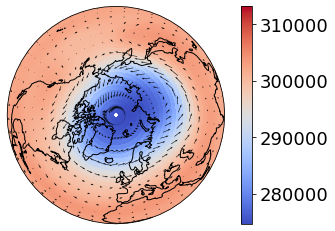

In [23]:
isel = dict(time=0,level=0)
fig,ax,data_crs = display_pole_field(
    da['z'].isel(isel),da['latitude'],da['longitude'],
    u=da['u'].isel(isel).data,v=da['v'].isel(isel).data,
)


In [34]:
t0 = da['time'][0]
print(t0)

<xarray.DataArray 'time' ()>
array('2018-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-01-01
Attributes:
    long_name:  time


In [100]:
(da['time'].data[1] - np.datetime64("1900-01-01T00:00:00")) / np.timedelta64(1, 'D') 

365.2478813559322

In [60]:
hcdir = "/scratch/jf4241/ecmwf_data/s2s_data/2021-12-23"
file0 = listdir(hcdir)[0]

hc2010-04-03_rt2017-04-03.nc


In [61]:
da = xr.open_dataset(join(hcdir,file0))

In [114]:
from datetime import datetime
datetime(da['time'].dt.year.item, da['time'].dt.month.item, da['time'].dt.day.item)

TypeError: an integer is required (got type method)

In [93]:
(da['time'].data[1] - da['time'].data[0])/np.timedelta64(1, 'h')

24.0

In [137]:
(da['time'] - np.datetime64(datetime(da['time'].dt.year.to_numpy()[0], 1, 1))) / np.timedelta64(1, "D")

<xarray.DataArray 'time' (time: 124)>
array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 , 26.75,
       27.  , 27.25, 27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75, 29.  ,
       29.25, 29.5 , 29.75, 30.  , 30.25, 30.5 , 30.75])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 ... 2018-01-31T18:00:00

array([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018])